In [1]:
# libraries 
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Oxford Covid-19 Government Response Tracker (OxCGRT)

https://github.com/OxCGRT/covid-policy-tracker

In this notebook we will explore data from the Oxford Government Response Tracker. This dataset aims to provide an overview of the policies implemented worldwide to curb the spread of COVID-19.


Why we need this? The response to COVID-19 has been highly heterogeneous in terms of timing, approach, and measures implemented. It is therefore important to have a way to systematically compare the response of different countries.

Questions we can answer with this data:
- Which measures were implemented? (Where and When)
- How are much are effective different measures in reducing the spread?
- (Coupling this data with mobility) How much different measures affect mobility?
- Inform an epidemiological model


First, we import data:

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv")
#df = pd.read_csv("../data/OxCGRT_latest.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("Columns:", df.columns.values)
print("\nCountries:", df.CountryName.unique())
df.head()

Columns: ['CountryName' 'CountryCode' 'RegionName' 'RegionCode' 'Jurisdiction'
 'Date' 'C1_School closing' 'C1_Flag' 'C2_Workplace closing' 'C2_Flag'
 'C3_Cancel public events' 'C3_Flag' 'C4_Restrictions on gatherings'
 'C4_Flag' 'C5_Close public transport' 'C5_Flag'
 'C6_Stay at home requirements' 'C6_Flag'
 'C7_Restrictions on internal movement' 'C7_Flag'
 'C8_International travel controls' 'E1_Income support' 'E1_Flag'
 'E2_Debt/contract relief' 'E3_Fiscal measures' 'E4_International support'
 'H1_Public information campaigns' 'H1_Flag' 'H2_Testing policy'
 'H3_Contact tracing' 'H4_Emergency investment in healthcare'
 'H5_Investment in vaccines' 'H6_Facial Coverings' 'H6_Flag'
 'H7_Vaccination policy' 'H7_Flag' 'H8_Protection of elderly people'
 'H8_Flag' 'M1_Wildcard' 'ConfirmedCases' 'ConfirmedDeaths'
 'StringencyIndex' 'StringencyIndexForDisplay' 'StringencyLegacyIndex'
 'StringencyLegacyIndexForDisplay' 'GovernmentResponseIndex'
 'GovernmentResponseIndexForDisplay' 'ContainmentH

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The dataset provides several index on policy response that are described here:
https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/interpretation_guide.md

We also import epidemiological data from https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data:

In [4]:
# reported cases in different countries
df_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

# table with info about countries (population)
lookup_tab = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv")

In [7]:
lookup_tab.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.20270,17.873900,Angola,32866268.0


In [5]:
df_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,137853,137853,141489,142414,142414,143183,143439,143439,143439,144285
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132665,132686,132697,132740,132763,132797,132828,132853,132875,132891
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,152210,153309,154486,155784,157005,158213,159563,160868,162155,163660
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14273,14273,14359,14379,14379,14464,14498,14498,14498,14577
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,40707,40805,40906,41061,41227,41405,41629,41736,41780,41879


We represent for a given country the evolution of the Stringency Index together with the number of COVID-19 reported cases:

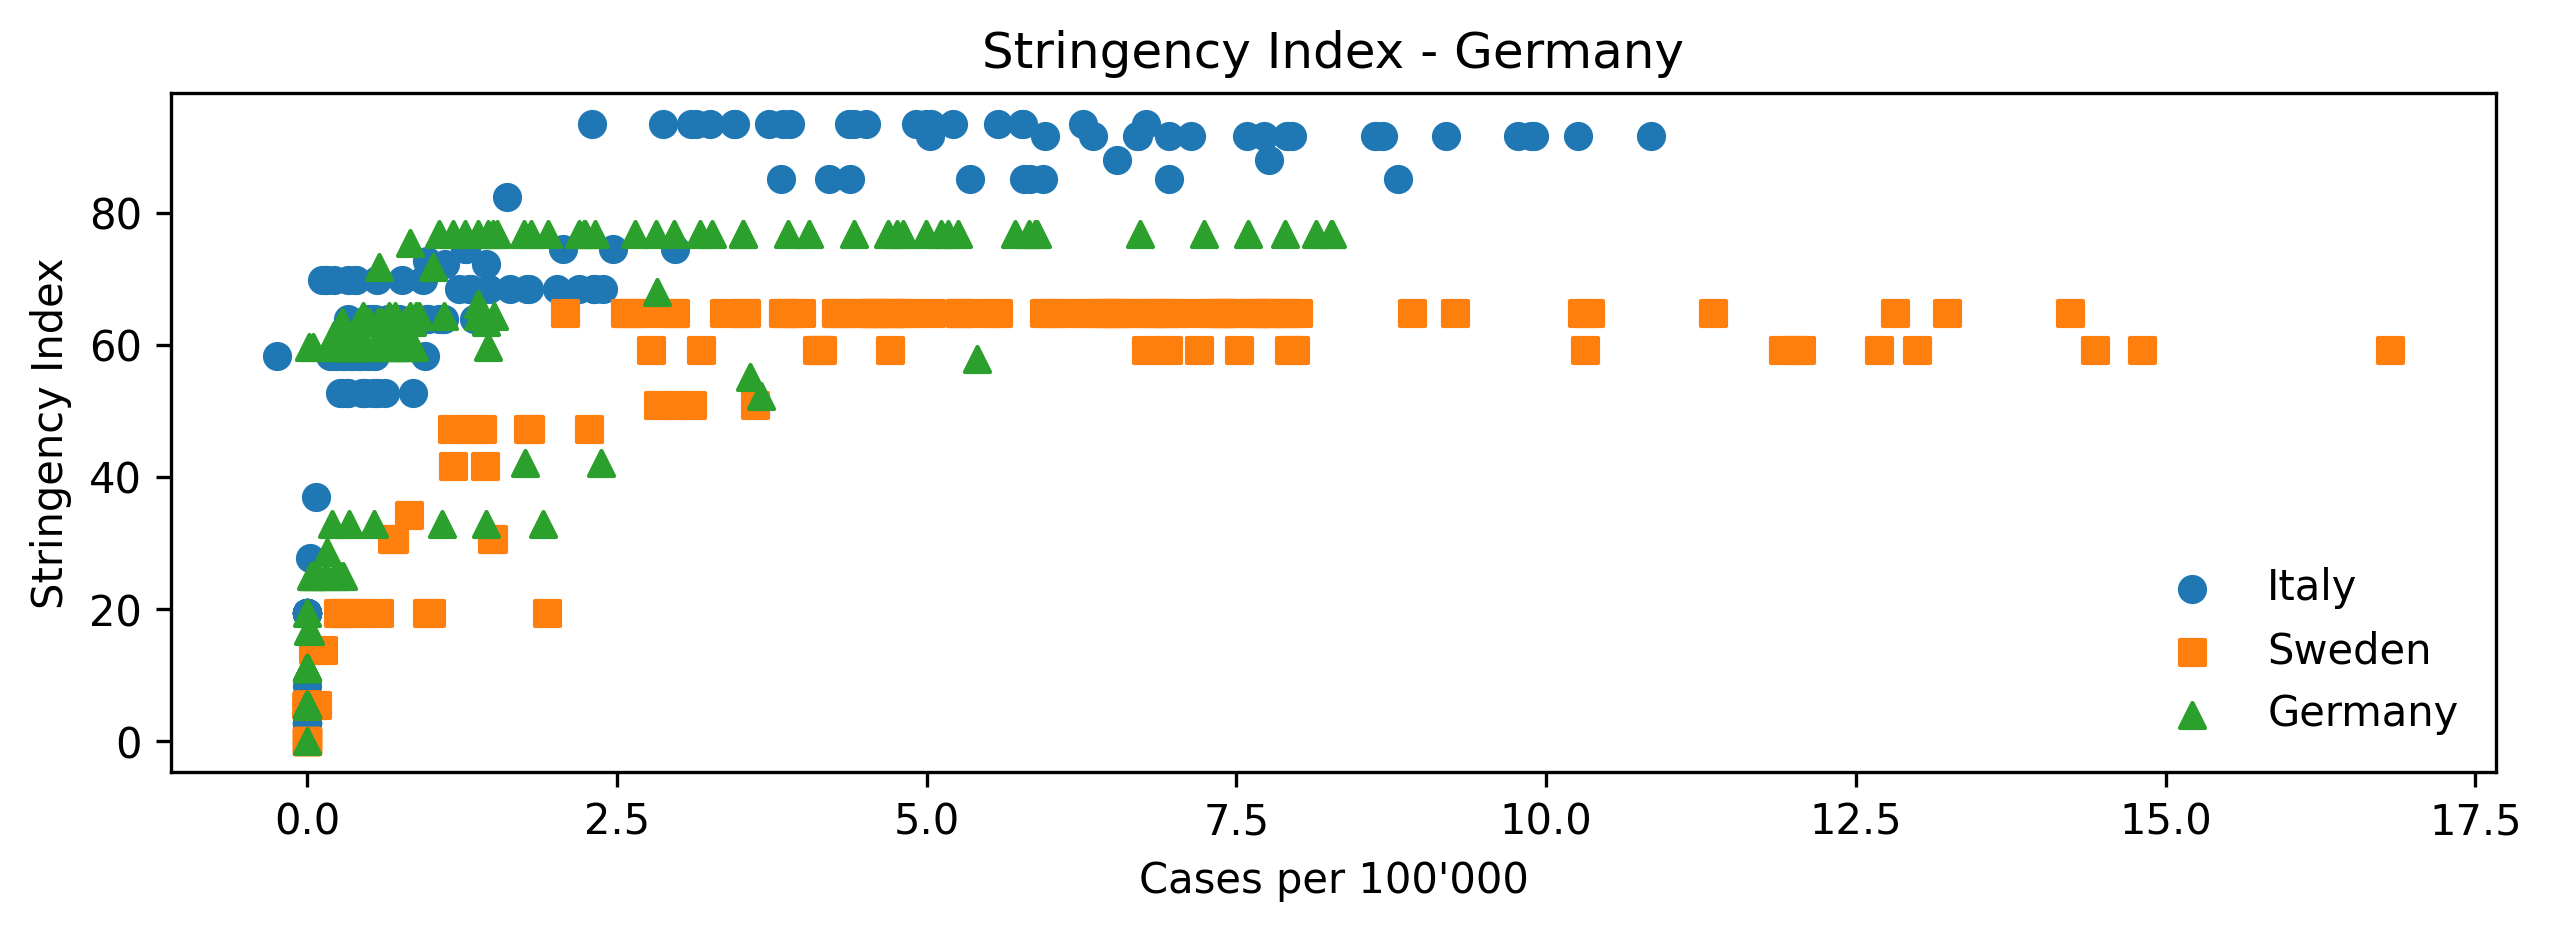

In [6]:
# date range
dates = pd.date_range(start=datetime(2020, 1, 23), end=datetime(2020, 6, 30), freq='D')

# country
fig, ax = plt.subplots(dpi=300, figsize=(10,3))
i, markers = 0, ['o', 's', '^']
for country in ["Italy", "Sweden", "Germany"]:
    #country = "Italy"
    cond = lambda df : (df['Country/Region']==country) & (df['Province/State'].isnull())

    # get population of the country
    pop = lookup_tab.loc[lookup_tab.Country_Region == country]['Population'].values[0]

    # stringency index
    index = np.array([df.loc[(df.CountryName==country) & (df.Date == int(date.strftime("%Y%m%d")))]["StringencyIndex"].values[0] for date in dates])

    # cases yesterday
    c1 = np.array([df_cases.loc[cond(df_cases)][(date - timedelta(days=1)).strftime("%-m/%-d/%y")].values[0] for date in dates])
    # cases today
    c2 = np.array([df_cases.loc[cond(df_cases)][date.strftime("%-m/%-d/%y")].values[0] for date in dates])
    cases = 100000 * (c2 - c1) / pop

    # plot
    plt.scatter(cases, index, label=country, marker=markers[i])
    i += 1
    
plt.title("Stringency Index - " + country)
plt.xlabel("Cases per 100'000")
plt.ylabel("Stringency Index")
plt.legend(loc="lower right", frameon=False)

We also plot the average stringency index during the first half of 2020 in different countries:

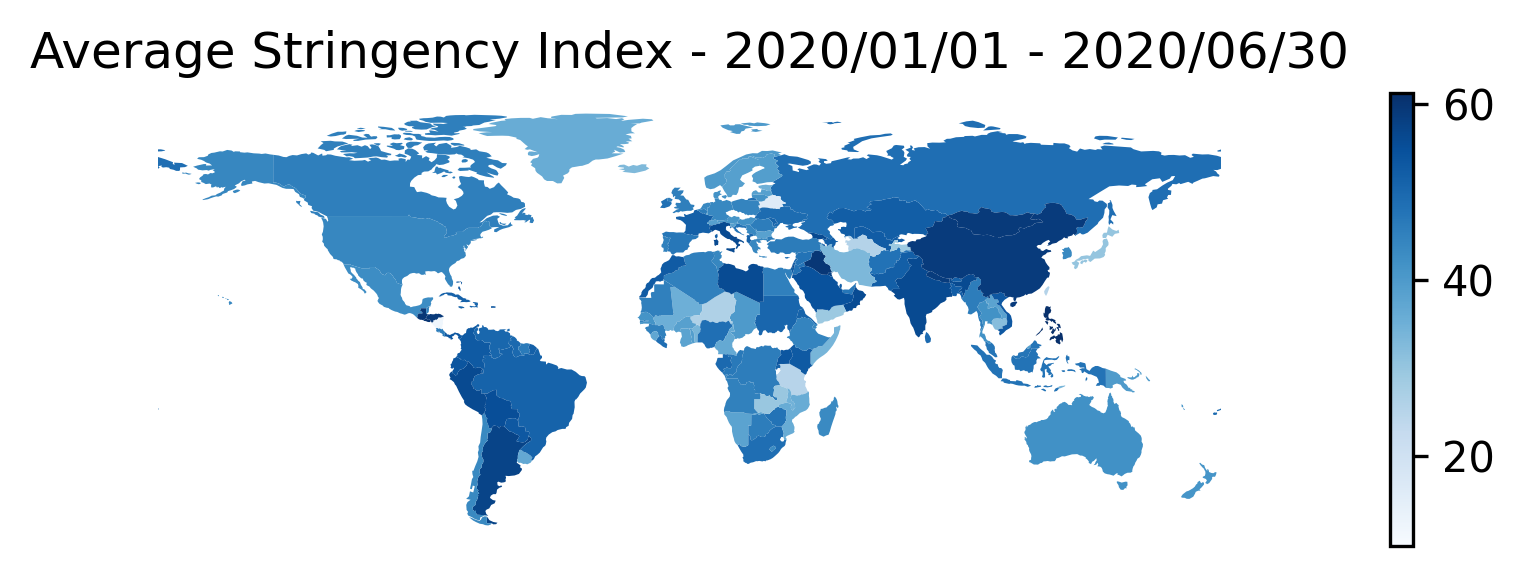

In [8]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

idxs = []
for name in world.name.unique():
    if name == "United States of America":
        name = "United States"
    elif name == "Dem. Rep. Congo":
        name = 'Democratic Republic of Congo'
    idxs.append(df.loc[(df.CountryName == name) & 
                       (df.Date >= 20200101) &
                       (df.Date <= 20200630)]["StringencyIndex"].mean())
    
    
world["StringencyIndex"] = idxs
fig, ax = plt.subplots(dpi=300, figsize=(10,2))
world.plot(column="StringencyIndex", legend=True, ax=ax, cmap="Blues")
ax.set_title("Average Stringency Index - 2020/01/01 - 2020/06/30")
ax.axis("off");